Imports

In [408]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy.stats import mode
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.base import clone
import joblib



# Style settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

Load Data

In [409]:
# 2. Load Data

# Load UFC dataset from uploaded CSV in Colab


# Load from local path in Colab
file_path = '/content/ufc-master.csv'
ufc = pd.read_csv(file_path)

# Create a working copy for processing
df = ufc.copy()

Show first 5 Rows

In [410]:
# Show first 5 rows
df.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,EmptyArena,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,BetterRank,Finish,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,True,Flyweight,MALE,5,0,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,Orthodox,172.72,175.26,125,0,6,0,4.41,0.49,0.8,2.61,0.47,6,3,42,3,0,2,4,2,4,0,12,Orthodox,165.10,170.18,125,34,31,0,-6,-6,-12,-3,-42,-3,-2,-4,7.62,5.08,-3,-4.41,-0.8,-2.61,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,SUB,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Welterweight,MALE,3,0,8,0,5.50,0.55,0.3,0.77,0.55,8,0,20,0,0,1,4,3,0,0,8,Orthodox,190.50,187.96,170,0,6,0,4.12,0.61,1.8,1.49,0.29,6,0,11,0,0,0,0,1,5,0,6,Orthodox,185.42,195.58,170,30,27,0,2,2,2,0,9,0,2,-5,5.08,-7.62,-3,1.38,-1.5,-0.72,NaN,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Heavyweight,MALE,3,0,4,0,5.13,0.57,0.2,0.45,0.63,4,4,44,0,0,1,4,6,1,0,12,Orthodox,200.66,203.20,250,0,1,0,5.49,0.60,0.5,0.58,0.21,7,2,33,3,0,0,3,4,2,0,9,Orthodox,193.04,205.74,245,34,36,0,3,-3,3,2,11,-3,2,-1,7.62,-2.54,2,-0.36,-0.3,-0.13,NaN,3.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,S-DEC,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Featherweight,MALE,3,2,0,0,3.74,0.44,0.5,0.47,0.25,1,2,7,0,0,0,0,0,1,0,1,Southpaw,175.26,177.80,145,1,0,0,2.30,0.58,1.6,3.45,0.41,6,2,22,0,1,0,5,0,1,0,7,Southpaw,177.80,177.80,145,30,36,1,0,-5,-6,0,-15,0,0,0,-2.54,0.00,6,1.44,-1.1,-2.98,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,KO/TKO,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,False,Feathe

Basic Information about the dataset

In [411]:
# Ensure all columns are printed in full
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Create summary of data types and missing values
column_summary = pd.DataFrame({
    'DataType': df.dtypes,
    'MissingValues': df.isnull().sum(),
    'MissingPercent': (df.isnull().sum() / len(df)) * 100  # Optional: % missing
})

# Sort by missing values
column_summary = column_summary.sort_values(by='MissingValues', ascending=False)

# Display full summary
display(column_summary)

,DataType,MissingValues,MissingPercent
BWFeatherweightRank,float64,6527,99.984681
RWFeatherweightRank,float64,6519,99.862132
BPFPRank,float64,6461,98.973652
BWFlyweightRank,float64,6455,98.881740
RWFlyweightRank,float64,6432,98.529412
BWStrawweightRank,float64,6428,98.468137
BWBantamweightRank,float64,6421,98.360907
BWelterweightRank,float64,6409,98.177083
BBantamweightRank,float64,6409,98.177083
BLightweightRank,float64,6408,98.161765


Filter out Unnecessary Columns

In [412]:
# Base columns you want to keep for modeling and feature engineering
columns_to_keep = [
    'Winner',
    'RedWins', 'RedLosses', 'BlueWins', 'BlueLosses',
    'RedWinsByKO', 'BlueWinsByKO', 'RedWinsBySubmission', 'BlueWinsBySubmission',
    'RedAvgSigStrPct', 'BlueAvgSigStrPct',
    'RedAvgTDLanded', 'BlueAvgTDLanded',
    'RedAvgTDPct', 'BlueAvgTDPct',
    'RedAvgSubAtt', 'BlueAvgSubAtt',
    'RedAvgSigStrLanded', 'BlueAvgSigStrLanded',
    'RedReachCms', 'BlueReachCms',
    'RedHeightCms', 'BlueHeightCms',
    'RedAge', 'BlueAge', 'HeightDif',
    'RedCurrentLoseStreak', 'BlueCurrentLoseStreak',
    'RedCurrentWinStreak', 'BlueCurrentWinStreak',


]

# Identify missing columns
missing_columns = [col for col in columns_to_keep if col not in df.columns]
if missing_columns:
    print("The following columns are missing from the dataset:")
    print(missing_columns)

# Only keep columns that exist in the DataFrame
df = df.loc[:, df.columns.intersection(columns_to_keep)].copy()

# Optional: show what columns you successfully kept
print(f"Remaining columns in dataset: {df.columns.tolist()}")



Remaining columns in dataset: ['Winner', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt', 'BlueAvgTDLanded', 'BlueAvgTDPct', 'BlueLosses', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWins', 'BlueHeightCms', 'BlueReachCms', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt', 'RedAvgTDLanded', 'RedAvgTDPct', 'RedLosses', 'RedWinsByKO', 'RedWinsBySubmission', 'RedWins', 'RedHeightCms', 'RedReachCms', 'RedAge', 'BlueAge', 'HeightDif']


Calculate New Features

In [413]:
# Win/Loss Ratio
if all(col in df.columns for col in ['RedWins', 'RedLosses']):
    df['RedWinLossRatio'] = df['RedWins'] / (df['RedWins'] + df['RedLosses'] + 1)

if all(col in df.columns for col in ['BlueWins', 'BlueLosses']):
    df['BlueWinLossRatio'] = df['BlueWins'] / (df['BlueWins'] + df['BlueLosses'] + 1)

df['WinLossRatioDif'] = df.get('RedWinLossRatio', 0) - df.get('BlueWinLossRatio', 0)


# Submission %
if all(col in df.columns for col in ['RedWinsBySubmission', 'RedWins']):
    df['RedSubPct'] = df['RedWinsBySubmission'] / (df['RedWins'] + 1)

if all(col in df.columns for col in ['BlueWinsBySubmission', 'BlueWins']):
    df['BlueSubPct'] = df['BlueWinsBySubmission'] / (df['BlueWins'] + 1)

df['SubPctDiff'] = df.get('RedSubPct', 0) - df.get('BlueSubPct', 0)

# Fight Experience
if all(col in df.columns for col in ['RedWins', 'RedLosses']):
    df['RedTotalFights'] = df['RedWins'] + df['RedLosses']

if all(col in df.columns for col in ['BlueWins', 'BlueLosses']):
    df['BlueTotalFights'] = df['BlueWins'] + df['BlueLosses']

df['FightExperienceDiff'] = df.get('RedTotalFights', 0) - df.get('BlueTotalFights', 0)

# Stat Differences
if all(col in df.columns for col in ['RedAvgTDLanded', 'BlueAvgTDLanded']):
    df['TDLandedDif'] = df['RedAvgTDLanded'] - df['BlueAvgTDLanded']

if all(col in df.columns for col in ['RedAvgSigStrPct', 'BlueAvgSigStrPct']):
    df['SigStrPctDif'] = df['RedAvgSigStrPct'] - df['BlueAvgSigStrPct']

if all(col in df.columns for col in ['RedReachCms', 'BlueReachCms']):
    df['ReachDif'] = df['RedReachCms'] - df['BlueReachCms']

if all(col in df.columns for col in ['RedAge', 'BlueAge']):
    df['AgeDif'] = df['RedAge'] - df['BlueAge']

if all(col in df.columns for col in ['RedAvgTDPct', 'BlueAvgTDPct']):
    df['TDPctDiff'] = df['RedAvgTDPct'] - df['BlueAvgTDPct']

if all(col in df.columns for col in ['RedAvgSubAtt', 'BlueAvgSubAtt']):
    df['SubAttDif'] = df['RedAvgSubAtt'] - df['BlueAvgSubAtt']

if all(col in df.columns for col in ['RedAvgSigStrLanded', 'BlueAvgSigStrLanded']):
    df['SigStrLandedDif'] = df['RedAvgSigStrLanded'] - df['BlueAvgSigStrLanded']



In [414]:
df.head()

,Winner,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLosses,BlueWinsByKO,BlueWinsBySubmission,BlueWins,BlueHeightCms,BlueReachCms,RedCurrentLoseStreak,RedCurrentWinStreak,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLosses,RedWinsByKO,RedWinsBySubmission,RedWins,RedHeightCms,RedReachCms,RedAge,BlueAge,HeightDif,RedWinLossRatio,BlueWinLossRatio,WinLossRatioDif,RedSubPct,BlueSubPct,SubPctDiff,RedTotalFights,BlueTotalFights,FightExperienceDiff,TDLandedDif,SigStrPctDif,ReachDif,AgeDif,TDPctDiff,SubAttDif,SigStrLandedDif
0,Red,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,172.72,175.26,0,6,4.41,0.49,0.8,2.61,0.47,3,2,4,12,165.10,170.18,34,31,7.62,0.750000,0.000000,0.750000,0.307692,0.000000,0.307692,15,0,15,2.61,0.49,-5.08,3,0.47,0.8,4.41
1,Red,0,8,5.50,0.55,0.3,0.77,0.55,0,3,0,8,190.50,187.96,0,6,4.12,0.61,1.8,1.49,0.29,0,1,5,6,185.42,195.58,30,27,5.08,0.857143,0.888889,-0.031746,0.714286,0.000000,0.714286,6,8,-2,0.72,0.06,7.62,3,-0.26,1.5,-1.38
2,Red,0,4,5.13,0.57,0.2,0.45,0.63,4,6,1,12,200.66,203.20,0,1,5.49,0.60,0.5,0.58,0.21,2,4,2,9,193.04,205.74,34,36,7.62,0.750000,0.705882,0.044118,0.200000,0.076923,0.123077,11,16,-5,0.13,0.03,2.54,-2,-0.42,0.3,0.36
3,Red,2,0,3.74,0.44,0.5,0.47,0.25,2,0,1,1,175.26,177.80,1,0,2.30,0.58,1.6,3.45,0.41,2,0,1,7,177.80,177.80,30,36,-2.54,0.700000,0.250000,0.450000,0.125000,0.500000,-0.375000,9,3,6,2.98,0.14,0.00,-6,0.16,1.1,-1.44
4,Blue,0,1,4.41,0.53,0.8,0.75,0.37,3,4,0,4,177.80,177.80,0,1,6.25,0.46,1.0,1.00,0.41,3,1,2,5,175.26,182.88,36,33,2.54,0.555556,0.500000,0.055556,0.333333,0.000000,0.333333,8,7,1,0.25,-0.07,5.08,3,0.04,0.2,1.84


Flip Winning Ratio so amount of wins is balanced for Red & Blue

In [415]:
# ---------------------------------------------------------
# Winner column handling and Red/Blue flip logic
# ---------------------------------------------------------

# Step 1: Normalize column names in both the original dataset (ufc) and working DataFrame (df)
# This removes leading/trailing spaces and makes column name matching consistent.
ufc.columns = ufc.columns.str.strip()
df.columns = df.columns.str.strip()

# Step 2: Identify the 'Winner' column from the original CSV.
# First, check for an exact match (case-insensitive) to "winner".
winner_candidates_exact = [c for c in ufc.columns if c.strip().lower() == 'winner']

if len(winner_candidates_exact) > 0:
    winner_col = winner_candidates_exact[0]
else:
    # If there is no exact match, look for any column that contains the word "winner".
    winner_candidates_fuzzy = [c for c in ufc.columns if 'winner' in c.strip().lower()]
    if len(winner_candidates_fuzzy) > 0:
        winner_col = winner_candidates_fuzzy[0]
    else:
        # If no match is found, raise an error and display all columns for troubleshooting.
        raise KeyError(
            "Could not find a 'Winner' column in your CSV. "
            "Check the CSV headers: "
            f"{list(ufc.columns)}"
        )

# Step 3: Ensure the 'Winner' column exists in df.
# If it was dropped earlier, merge it back from the original 'ufc' dataset.
if 'Winner' not in df.columns:
    # Bring in the Winner column from the original data, aligning by index.
    df = df.merge(ufc[[winner_col]], left_index=True, right_index=True, how='left')
    if winner_col != 'Winner':
        # Rename the column to exactly 'Winner' for consistency.
        df.rename(columns={winner_col: 'Winner'}, inplace=True)
else:
    # If the Winner column exists but has a different name, rename it to 'Winner'.
    if winner_col != 'Winner':
        df.rename(columns={winner_col: 'Winner'}, inplace=True)

# Step 4: Filter out rows where 'Winner' is not 'Red' or 'Blue'.
# Convert to lowercase for case-insensitive comparison.
df['Winner'] = df['Winner'].astype(str).str.strip()
valid_mask = df['Winner'].str.lower().isin(['red', 'blue'])
df = df.loc[valid_mask].copy()

# Step 5: Create a binary winner column:
# 1 = Red Fighter wins, 0 = Blue Fighter wins.
df['WinnerBinary'] = (df['Winner'].str.lower() == 'red').astype(int)

# Step 6: Identify all columns that belong to the Red or Blue fighter.
# This will be used for flipping to make the model color-agnostic.
red_cols = [col for col in df.columns if col.startswith("Red")]
blue_cols = [col for col in df.columns if col.startswith("Blue")]

# Step 7: Create a random mask to select 50% of rows to flip.
# This random flipping removes color bias from the model.
np.random.seed(42)
flip_mask = np.random.rand(len(df)) < 0.5

# Step 8: Flip the Red and Blue fighter stats for the selected rows.
for red_col in red_cols:
    blue_col = red_col.replace("Red", "Blue")
    if blue_col in df.columns:
        temp = df.loc[flip_mask, red_col].copy()
        df.loc[flip_mask, red_col] = df.loc[flip_mask, blue_col]
        df.loc[flip_mask, blue_col] = temp

# Step 9: Flip the WinnerBinary label for the flipped rows.
df.loc[flip_mask, 'WinnerBinary'] = 1 - df.loc[flip_mask, 'WinnerBinary']

# Step 10: (Optional) Drop the text-based 'Winner' column if only the binary is needed.
# df.drop(columns=['Winner'], inplace=True)

# Step 11: Print the class balance for verification.
print("Class balance (0 = Blue win, 1 = Red win):")
print(df['WinnerBinary'].value_counts(dropna=False))



Class balance (0 = Blue win, 1 = Red win):
WinnerBinary
1    3297
0    3231
Name: count, dtype: int64


In [416]:
df.head()

,Winner,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLosses,BlueWinsByKO,BlueWinsBySubmission,BlueWins,BlueHeightCms,BlueReachCms,RedCurrentLoseStreak,RedCurrentWinStreak,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLosses,RedWinsByKO,RedWinsBySubmission,RedWins,RedHeightCms,RedReachCms,RedAge,BlueAge,HeightDif,RedWinLossRatio,BlueWinLossRatio,WinLossRatioDif,RedSubPct,BlueSubPct,SubPctDiff,RedTotalFights,BlueTotalFights,FightExperienceDiff,TDLandedDif,SigStrPctDif,ReachDif,AgeDif,TDPctDiff,SubAttDif,SigStrLandedDif,WinnerBinary
0,Red,0,6,4.41,0.49,0.8,2.61,0.47,3,2,4,12,165.10,170.18,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,172.72,175.26,31,34,7.62,0.000000,0.750000,0.750000,0.000000,0.307692,0.307692,0,15,15,2.61,0.49,-5.08,3,0.47,0.8,4.41,0
1,Red,0,8,5.50,0.55,0.3,0.77,0.55,0,3,0,8,190.50,187.96,0,6,4.12,0.61,1.8,1.49,0.29,0,1,5,6,185.42,195.58,30,27,5.08,0.857143,0.888889,-0.031746,0.714286,0.000000,0.714286,6,8,-2,0.72,0.06,7.62,3,-0.26,1.5,-1.38,1
2,Red,0,4,5.13,0.57,0.2,0.45,0.63,4,6,1,12,200.66,203.20,0,1,5.49,0.60,0.5,0.58,0.21,2,4,2,9,193.04,205.74,34,36,7.62,0.750000,0.705882,0.044118,0.200000,0.076923,0.123077,11,16,-5,0.13,0.03,2.54,-2,-0.42,0.3,0.36,1
3,Red,2,0,3.74,0.44,0.5,0.47,0.25,2,0,1,1,175.26,177.80,1,0,2.30,0.58,1.6,3.45,0.41,2,0,1,7,177.80,177.80,30,36,-2.54,0.700000,0.250000,0.450000,0.125000,0.500000,-0.375000,9,3,6,2.98,0.14,0.00,-6,0.16,1.1,-1.44,1
4,Blue,0,1,6.25,0.46,1.0,1.00,0.41,3,1,2,5,175.26,182.88,0,1,4.41,0.53,0.8,0.75,0.37,3,4,0,4,177.80,177.80,33,36,2.54,0.500000,0.555556,0.055556,0.000000,0.333333,0.333333,7,8,1,0.25,-0.07,5.08,3,0.04,0.2,1.84,1


Correlation of Features with WinnerBinary:

                       Correlation
BlueAge                   0.097974
RedWinLossRatio           0.087290
RedAvgTDLanded            0.085524
RedCurrentWinStreak       0.083531
RedAvgSigStrPct           0.073792
RedAvgTDPct               0.067424
BlueCurrentLoseStreak     0.045596
SubAttDif                 0.035294
RedAvgSigStrLanded        0.031003
AgeDif                    0.025453
RedWins                   0.015225
ReachDif                  0.013030
BlueWins                  0.000403
FightExperienceDiff      -0.000931
HeightDif                -0.001992
TDPctDiff                -0.013953
SigStrLandedDif          -0.021005
SigStrPctDif             -0.022378
RedCurrentLoseStreak     -0.028978
BlueAvgSigStrLanded      -0.031750
BlueAvgTDPct             -0.043019
BlueWinLossRatio         -0.071189
BlueCurrentWinStreak     -0.073289
BlueAvgSigStrPct         -0.079345
BlueAvgTDLanded          -0.079398
RedAge                   -0.101990


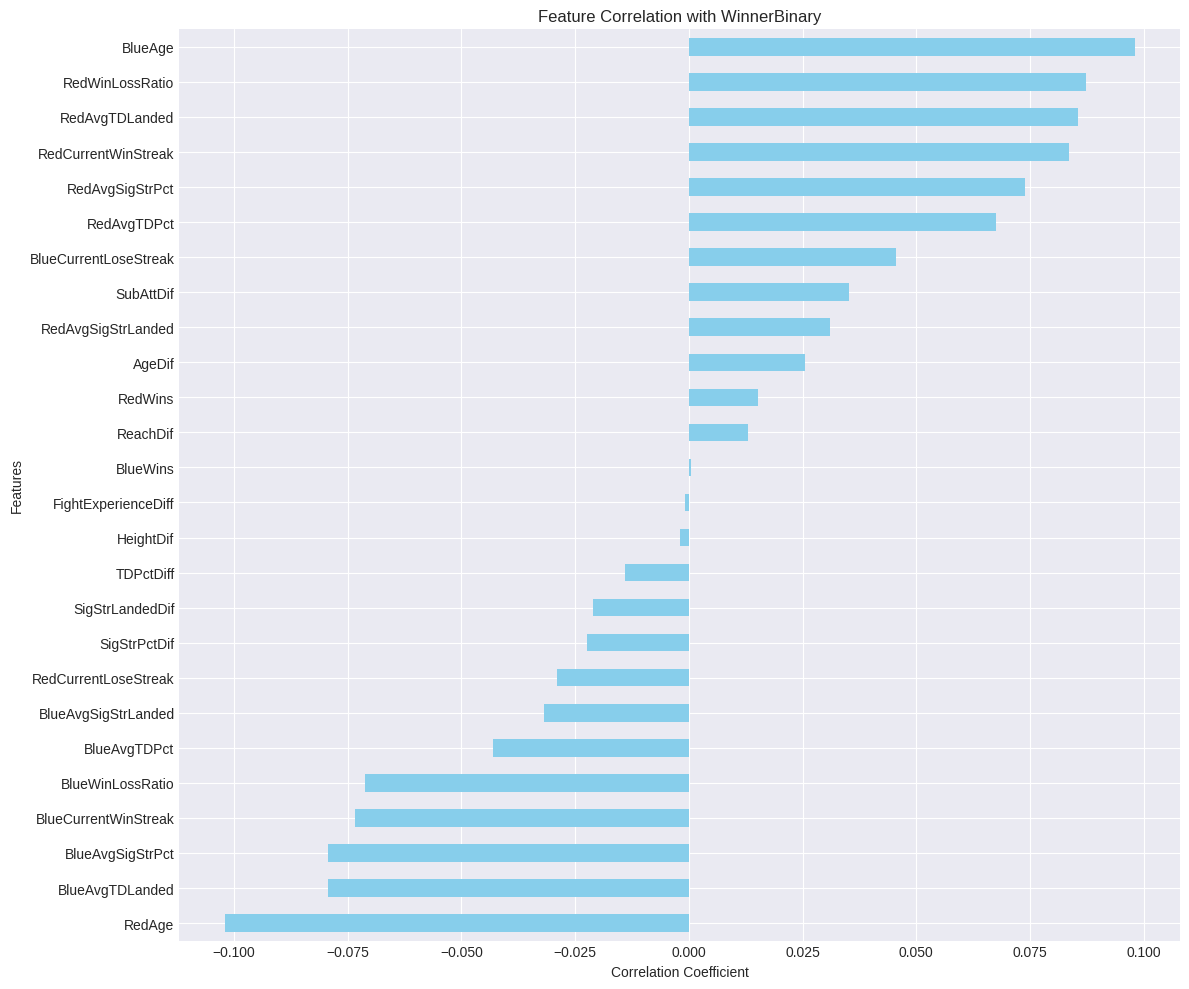

In [426]:

# List of all relevant features including target
features = [
    'RedWinLossRatio', 'BlueWinLossRatio', 'RedWins', 'BlueWins',
    'RedAge', 'BlueAge', 'AgeDif',
    'RedAvgTDLanded', 'BlueAvgTDLanded', 'RedAvgTDPct', 'BlueAvgTDPct',  'TDPctDiff',
    'RedAvgSigStrPct', 'BlueAvgSigStrPct', 'SigStrPctDif',
    'RedAvgSigStrLanded', 'BlueAvgSigStrLanded', 'SigStrLandedDif',
    'SubAttDif', 'WinnerBinary', 'HeightDif',
    'ReachDif', 'FightExperienceDiff',
    'RedCurrentWinStreak', 'BlueCurrentWinStreak',
    'RedCurrentLoseStreak', 'BlueCurrentLoseStreak',

]

# Compute correlations with WinnerBinary
corr_df = df[features].corr()['WinnerBinary'].drop('WinnerBinary').sort_values(ascending=False)

# Print correlation values as a table
print("Correlation of Features with WinnerBinary:\n")
print(corr_df.to_frame(name='Correlation'))

# Plot the sorted correlation values
plt.figure(figsize=(12, 10))
corr_df.plot(kind='barh', color='skyblue')
plt.title('Feature Correlation with WinnerBinary')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True)
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()




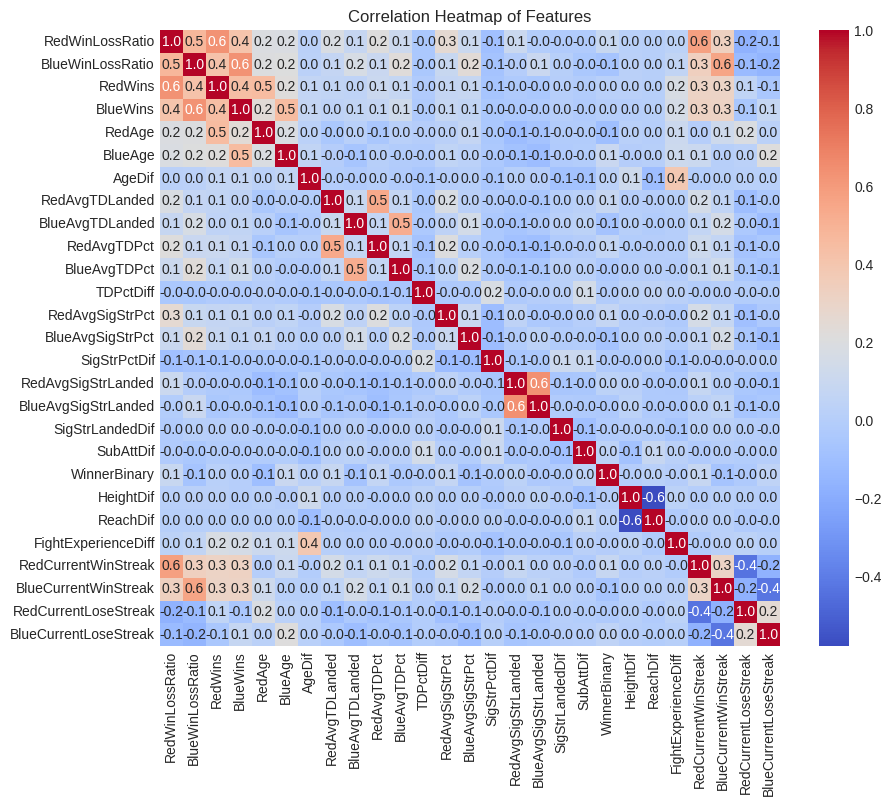

In [427]:
# Remove duplicate columns from the heatmap input
clean_features = list(dict.fromkeys(features + ['WinnerBinary']))

plt.figure(figsize=(10, 8))
sns.heatmap(df[clean_features].corr(), annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

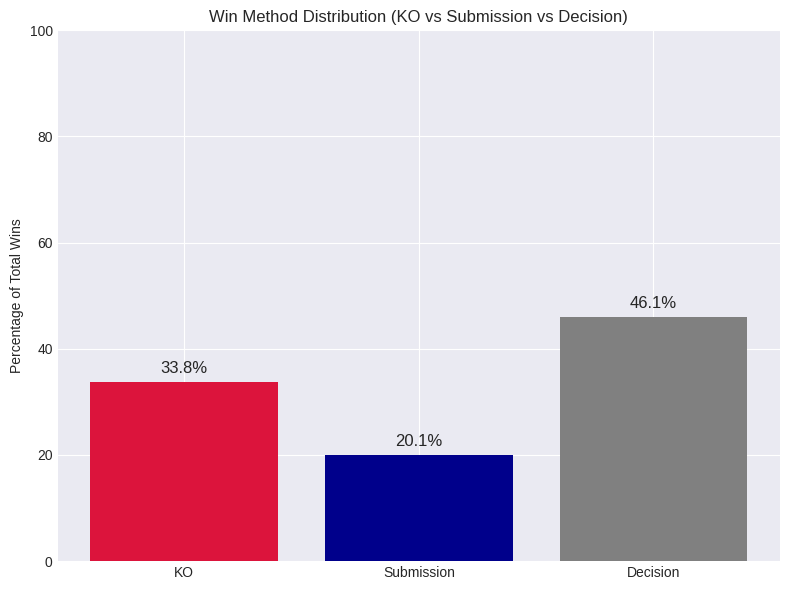

In [428]:

# Total wins by method
ko_wins = df['RedWinsByKO'].sum() + df['BlueWinsByKO'].sum()
sub_wins = df['RedWinsBySubmission'].sum() + df['BlueWinsBySubmission'].sum()

# Assuming total wins = RedWins + BlueWins
total_wins = df['RedWins'].sum() + df['BlueWins'].sum()
decision_wins = total_wins - (ko_wins + sub_wins)

# Create DataFrame for plotting
win_data = pd.DataFrame({
    'Method': ['KO', 'Submission', 'Decision'],
    'Wins': [ko_wins, sub_wins, decision_wins]
})

# Convert to percentages
win_data['Percentage'] = (win_data['Wins'] / win_data['Wins'].sum()) * 100

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(win_data['Method'], win_data['Percentage'], color=['crimson', 'darkblue', 'gray'])

# Add labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

plt.ylim(0, 100)
plt.ylabel('Percentage of Total Wins')
plt.title('Win Method Distribution (KO vs Submission vs Decision)')
plt.tight_layout()
plt.show()


In [429]:
df.head()

,Winner,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLosses,BlueWinsByKO,BlueWinsBySubmission,BlueWins,BlueHeightCms,BlueReachCms,RedCurrentLoseStreak,RedCurrentWinStreak,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLosses,RedWinsByKO,RedWinsBySubmission,RedWins,RedHeightCms,RedReachCms,RedAge,BlueAge,HeightDif,RedWinLossRatio,BlueWinLossRatio,WinLossRatioDif,RedSubPct,BlueSubPct,SubPctDiff,RedTotalFights,BlueTotalFights,FightExperienceDiff,TDLandedDif,SigStrPctDif,ReachDif,AgeDif,TDPctDiff,SubAttDif,SigStrLandedDif,WinnerBinary
0,Red,0,6,4.41,0.49,0.8,2.61,0.47,3,2,4,12,165.10,170.18,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,172.72,175.26,31,34,7.62,0.000000,0.750000,0.750000,0.000000,0.307692,0.307692,0,15,15,2.61,0.49,-5.08,3,0.47,0.8,4.41,0
1,Red,0,8,5.50,0.55,0.3,0.77,0.55,0,3,0,8,190.50,187.96,0,6,4.12,0.61,1.8,1.49,0.29,0,1,5,6,185.42,195.58,30,27,5.08,0.857143,0.888889,-0.031746,0.714286,0.000000,0.714286,6,8,-2,0.72,0.06,7.62,3,-0.26,1.5,-1.38,1
2,Red,0,4,5.13,0.57,0.2,0.45,0.63,4,6,1,12,200.66,203.20,0,1,5.49,0.60,0.5,0.58,0.21,2,4,2,9,193.04,205.74,34,36,7.62,0.750000,0.705882,0.044118,0.200000,0.076923,0.123077,11,16,-5,0.13,0.03,2.54,-2,-0.42,0.3,0.36,1
3,Red,2,0,3.74,0.44,0.5,0.47,0.25,2,0,1,1,175.26,177.80,1,0,2.30,0.58,1.6,3.45,0.41,2,0,1,7,177.80,177.80,30,36,-2.54,0.700000,0.250000,0.450000,0.125000,0.500000,-0.375000,9,3,6,2.98,0.14,0.00,-6,0.16,1.1,-1.44,1
4,Blue,0,1,6.25,0.46,1.0,1.00,0.41,3,1,2,5,175.26,182.88,0,1,4.41,0.53,0.8,0.75,0.37,3,4,0,4,177.80,177.80,33,36,2.54,0.500000,0.555556,0.055556,0.000000,0.333333,0.333333,7,8,1,0.25,-0.07,5.08,3,0.04,0.2,1.84,1


Feature Selection

In [457]:
features = [
    'RedWinLossRatio', 'BlueWinLossRatio',
    'RedAge', 'BlueAge', 'AgeDif',
    'RedAvgTDLanded', 'BlueAvgTDLanded', 'TDLandedDif',
    'RedAvgTDPct', 'BlueAvgTDPct', 'TDPctDiff',
    'RedAvgSigStrPct', 'BlueAvgSigStrPct', 'SigStrPctDif',
    'RedAvgSigStrLanded', 'BlueAvgSigStrLanded', 'SigStrLandedDif',
    'ReachDif', 'SubAttDif', 'HeightDif',
    'RedCurrentWinStreak', 'BlueCurrentWinStreak',
    'RedCurrentLoseStreak', 'BlueCurrentLoseStreak',

]

Split Features and Target

In [458]:
# Split Features and Target
X = df[features]
y = df['WinnerBinary']


Fill in Missing Values

In [459]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

Feature Scaling

In [460]:
# Initialize the scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_imputed)

Train Test Split

In [461]:
# Split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)



Train Model

In [462]:
from sklearn.base import clone
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.stats import mode
import matplotlib.pyplot as plt
import numpy as np

# Define tuned models
models = {
    'LOG-R': LogisticRegression(max_iter=1000),
    'GNB': GaussianNB(),
    'DT': DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42),
    'RF': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    'SVM': SVC(C=0.1, gamma=0.01, kernel='rbf', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=25, weights='uniform', metric='euclidean')
}

# Initialize metric storage
model_names = []
train_accs, test_accs = [], []
train_prec, test_prec = [], []
train_rec, test_rec = [], []
train_f1s, test_f1s = [], []
classification_reports = {}

# Train and evaluate each model
for name, model in models.items():
    clf = clone(model)
    clf.fit(x_train, y_train)

    # Training predictions
    y_train_pred = clf.predict(x_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    train_accs.append(acc_train)
    train_prec.append(precision_score(y_train, y_train_pred, average='weighted', zero_division=0))
    train_rec.append(recall_score(y_train, y_train_pred, average='weighted', zero_division=0))
    train_f1s.append(f1_score(y_train, y_train_pred, average='weighted', zero_division=0))

    # Testing predictions
    y_test_pred = clf.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    test_accs.append(acc_test)
    test_prec.append(precision_score(y_test, y_test_pred, average='weighted', zero_division=0))
    test_rec.append(recall_score(y_test, y_test_pred, average='weighted', zero_division=0))
    test_f1s.append(f1_score(y_test, y_test_pred, average='weighted', zero_division=0))

    model_names.append(name)

    # Save detailed classification reports
    classification_reports[name] = {
        'Train': f"Accuracy: {acc_train:.4f}\n" + classification_report(y_train, y_train_pred, zero_division=0),
        'Test': f"Accuracy: {acc_test:.4f}\n" + classification_report(y_test, y_test_pred, zero_division=0)
    }

# KMeans with optimal k=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(x_train)

cluster_labels = kmeans.predict(x_test)

# Map clusters to majority class labels from training set
train_cluster_labels = kmeans.predict(x_train)
cluster_to_label = {}

for cluster in range(optimal_k):
    indices = np.where(train_cluster_labels == cluster)[0]  # get index positions as array
    if len(indices) > 0:
        majority_label = mode(y_train.iloc[indices], keepdims=False).mode
        cluster_to_label[cluster] = majority_label
    else:
        cluster_to_label[cluster] = 0  # fallback default

# Map predicted clusters to labels
mapped_labels = np.array([cluster_to_label[c] for c in cluster_labels])

# Append results
model_names.append("KMeans_k=5")
train_accs.append(None)
train_prec.append(None)
train_rec.append(None)
train_f1s.append(None)

acc_kmeans = accuracy_score(y_test, mapped_labels)
test_accs.append(acc_kmeans)
test_prec.append(precision_score(y_test, mapped_labels, average='weighted', zero_division=0))
test_rec.append(recall_score(y_test, mapped_labels, average='weighted', zero_division=0))
test_f1s.append(f1_score(y_test, mapped_labels, average='weighted', zero_division=0))

classification_reports['KMeans_k=5'] = {
    'Train': "Not applicable for unsupervised learning",
    'Test': f"Accuracy: {acc_kmeans:.2f}\n" + classification_report(y_test, mapped_labels, zero_division=0)
}




In [456]:
from sklearn.ensemble import VotingClassifier

# Ensemble
ensemble = VotingClassifier(
    estimators=[
        ('SVM', models['SVM']),
        ('RF', models['RF'])
    ],
    voting='soft'
)

# Fit on training data
ensemble.fit(x_train, y_train)

# Evaluate
print("Training accuracy:", ensemble.score(x_train, y_train))
print("Testing accuracy:", ensemble.score(x_test, y_test))

Training accuracy: 0.762967826657912
Testing accuracy: 0.5895865237366003


Evaluation Metrics


====== LOG-R ======
Train Report:
 Accuracy: 0.6084
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      2281
           1       0.61      0.61      0.61      2288

    accuracy                           0.61      4569
   macro avg       0.61      0.61      0.61      4569
weighted avg       0.61      0.61      0.61      4569

Test Report:
 Accuracy: 0.5886
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       950
           1       0.60      0.60      0.60      1009

    accuracy                           0.59      1959
   macro avg       0.59      0.59      0.59      1959
weighted avg       0.59      0.59      0.59      1959


====== GNB ======
Train Report:
 Accuracy: 0.5892
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      2281
           1       0.60      0.56      0.58      2288

    accuracy                           0.59    

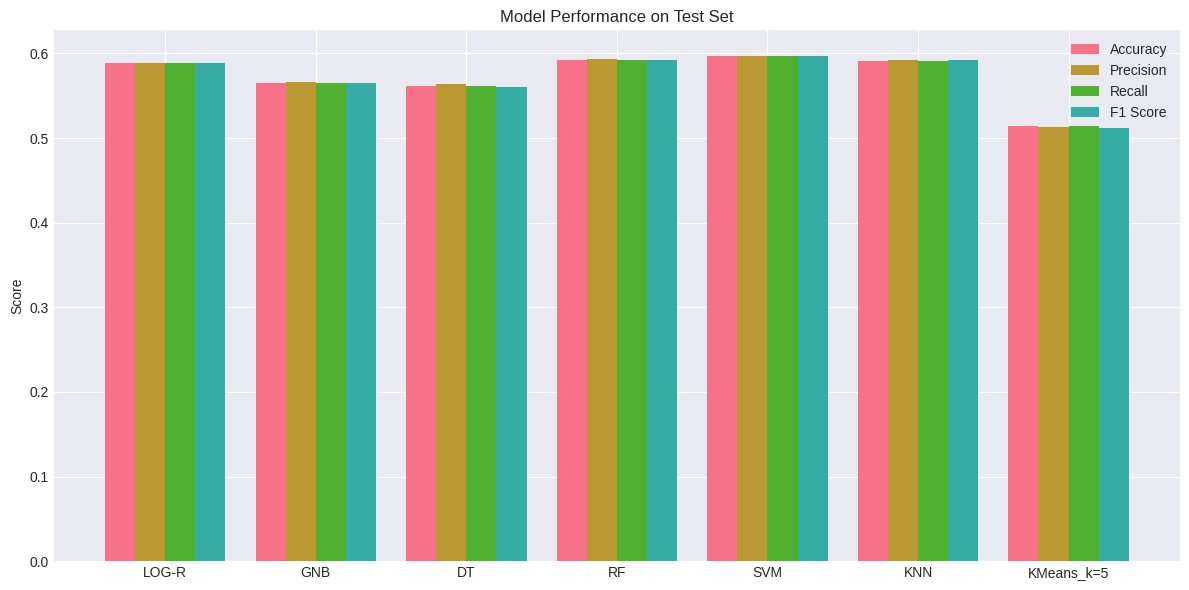

In [463]:
# Print all classification reports
for model in model_names:
    print(f"\n====== {model} ======")
    print("Train Report:\n", classification_reports[model]['Train'])
    print("Test Report:\n", classification_reports[model]['Test'])

# Plot test performance metrics
plt.figure(figsize=(12, 6))
x = np.arange(len(model_names))
bar_width = 0.2

plt.bar(x - 1.5*bar_width, test_accs, width=bar_width, label='Accuracy')
plt.bar(x - 0.5*bar_width, test_prec, width=bar_width, label='Precision')
plt.bar(x + 0.5*bar_width, test_rec, width=bar_width, label='Recall')
plt.bar(x + 1.5*bar_width, test_f1s, width=bar_width, label='F1 Score')

plt.xticks(x, model_names)
plt.ylabel('Score')
plt.title('Model Performance on Test Set')
plt.legend()
plt.tight_layout()
plt.show()

Cross Validation

LOG-R - Fold Accuracies: [0.5949464  0.59264931 0.5957121  0.58237548 0.60383142] | Mean Accuracy: 0.5939
GNB - Fold Accuracies: [0.5941807  0.56584992 0.58499234 0.56168582 0.57624521] | Mean Accuracy: 0.5766
DT - Fold Accuracies: [0.54900459 0.54364472 0.55742726 0.56015326 0.55862069] | Mean Accuracy: 0.5538
RF - Fold Accuracies: [0.58192956 0.60030628 0.60796325 0.57854406 0.59463602] | Mean Accuracy: 0.5927
SVM - Fold Accuracies: [0.59341501 0.59035222 0.60490046 0.58314176 0.60076628] | Mean Accuracy: 0.5945
KNN - Fold Accuracies: [0.56355283 0.56278714 0.59111792 0.53716475 0.57164751] | Mean Accuracy: 0.5653


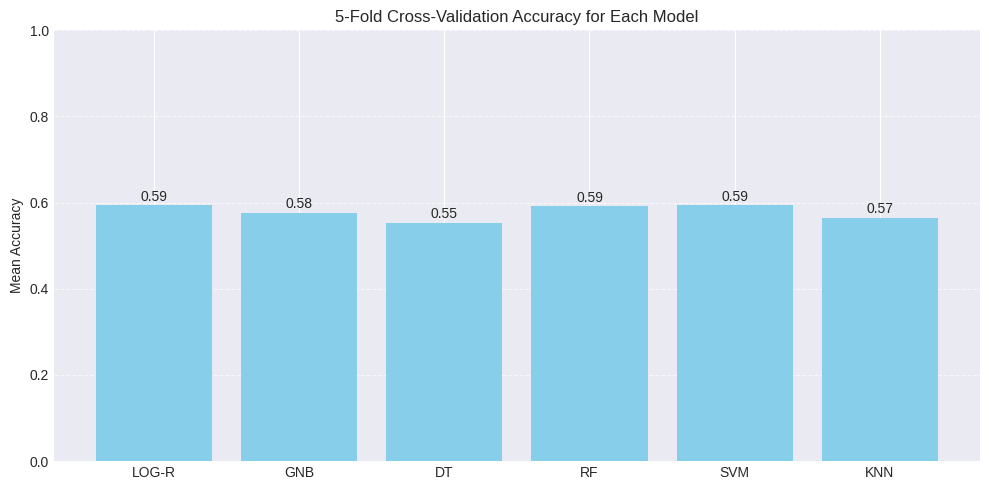

In [464]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_means = []

# Evaluate each model using cross_val_score
for name, model in models.items():
    scores = cross_val_score(model, x_scaled, y, cv=cv, scoring='accuracy')
    mean_score = np.mean(scores)
    print(f"{name} - Fold Accuracies: {scores} | Mean Accuracy: {mean_score:.4f}")
    cv_means.append(mean_score)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(models.keys(), cv_means, color='skyblue')
plt.ylabel("Mean Accuracy")
plt.title("5-Fold Cross-Validation Accuracy for Each Model")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(cv_means):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

Elbow Method for Optimal k

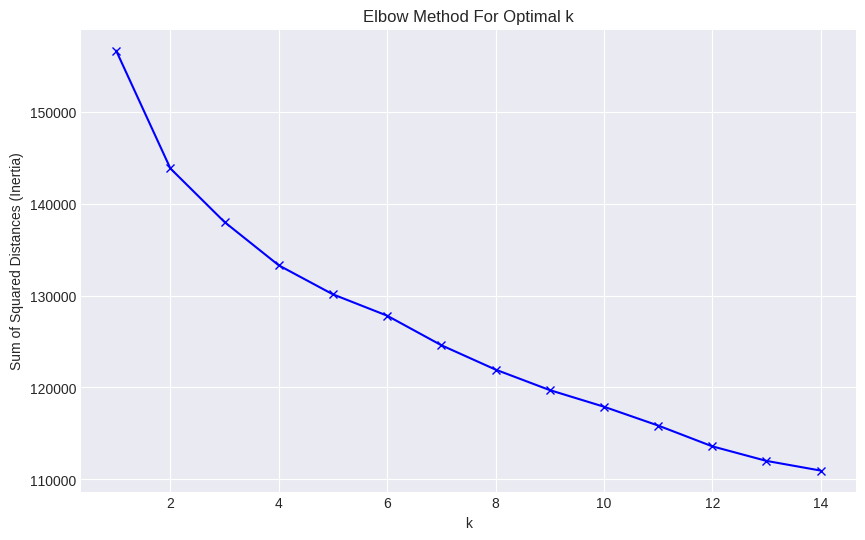

In [465]:
# Elbow Method for Optimal k
inertia = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()




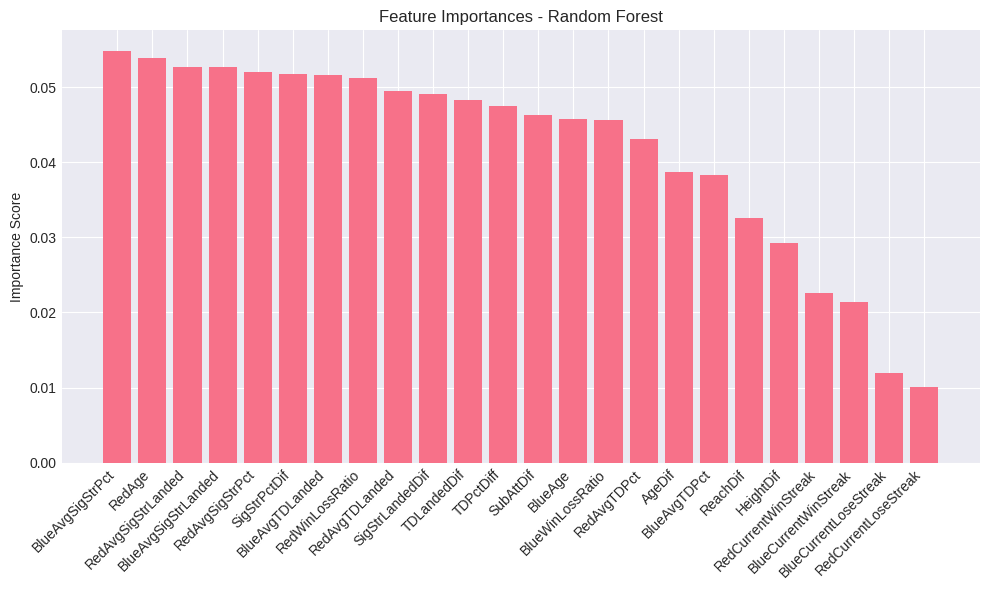

In [466]:

# Train Random Forest if not already
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(x_train, y_train)

# Plot feature importances
importances = rf.feature_importances_
feature_names = df[features].columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


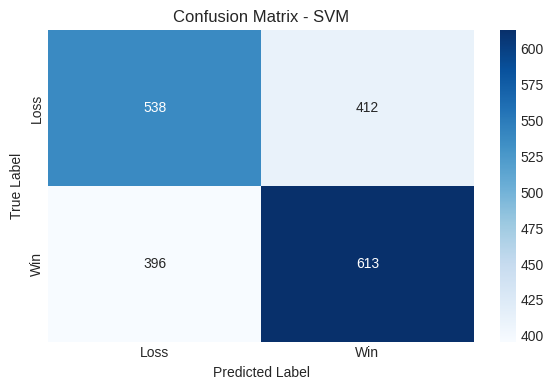

In [468]:
# Train SVM (make sure your x_train/x_test are scaled for SVM)
svm = SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(x_train, y_train)

# Predict on test data
y_pred_svm = svm.predict(x_test)

# Create confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.tight_layout()
plt.show()

Dowwnload Model

In [476]:
import joblib
from google.colab import files   # <-- this is required for files.download
from sklearn.svm import SVC

# Train SVM (use scaled features for better accuracy)
svm = SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(x_train, y_train)

# Save the trained SVM model
joblib.dump(svm, 'svm_model.pkl')

# Download the saved model
files.download('svm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 1. RandomForestClassifier
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(x_train, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)
print("Best Random Forest Score:", rf_grid.best_score_)

# 2. DecisionTreeClassifier
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(x_train, y_train)

print("Best Decision Tree Params:", dt_grid.best_params_)
print("Best Decision Tree Score:", dt_grid.best_score_)

# 3. SVC
svc_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

svc_grid = GridSearchCV(SVC(probability=True), svc_params, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid.fit(x_train, y_train)

print("Best SVC Params:", svc_grid.best_params_)
print("Best SVC Score:", svc_grid.best_score_)

best_rf_model = rf_grid.best_estimator_
best_rf_model.predict(x_test)
'''

In [ ]:
df['WinnerBinary'].value_counts(normalize=True)

In [ ]:
'''

# 2. Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [5, 10, 20, None],          # Tree depth
    'min_samples_split': [2, 5, 10],         # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Min samples at a leaf node
    'max_features': ['sqrt', 'log2']         # Number of features to consider
}

# 3. Initialize base model
rf = RandomForestClassifier(random_state=42)

# 4. Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 5. Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# 6. Evaluate best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

# 7. Report results
print(" Best Parameters:", grid_search.best_params_)
print(" Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
'''